In [71]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [72]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [73]:
# Load dataset
df = pd.read_csv("dataset.csv")

# Display the first few rows
print(df.head())

# Check dataset information
print(df.info())

# Check if there are missing values
print(df.isnull().sum())


   Soil Moisture  Temperature  Air Humidity  Pump
0     647.380179    30.431505     69.852301     0
1     411.648193    33.657445     79.655600     1
2     629.211823    24.774915     60.224057     1
3     856.002509    32.775907     59.148471     0
4     406.237151    25.693217     67.330854     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Soil Moisture  5000 non-null   float64
 1   Temperature    5000 non-null   float64
 2   Air Humidity   5000 non-null   float64
 3   Pump           5000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 156.4 KB
None
Soil Moisture    0
Temperature      0
Air Humidity     0
Pump             0
dtype: int64


In [74]:
# Fill missing values with the median for numerical columns
df.fillna(df.median(numeric_only=True), inplace=True)


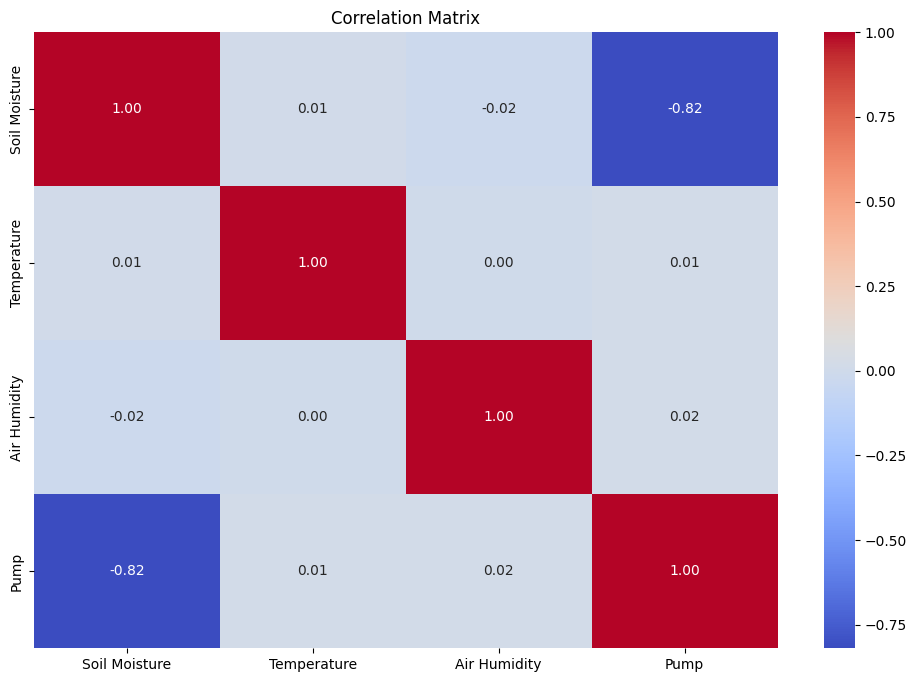

In [75]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


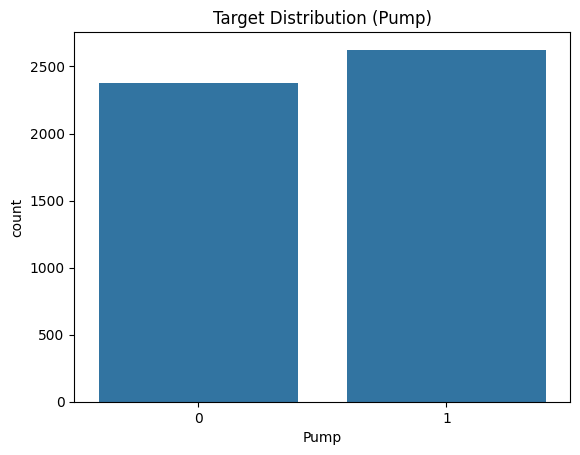

In [76]:
# Plot target distribution
sns.countplot(x='Pump', data=df)
plt.title("Target Distribution (Pump)")
plt.show()


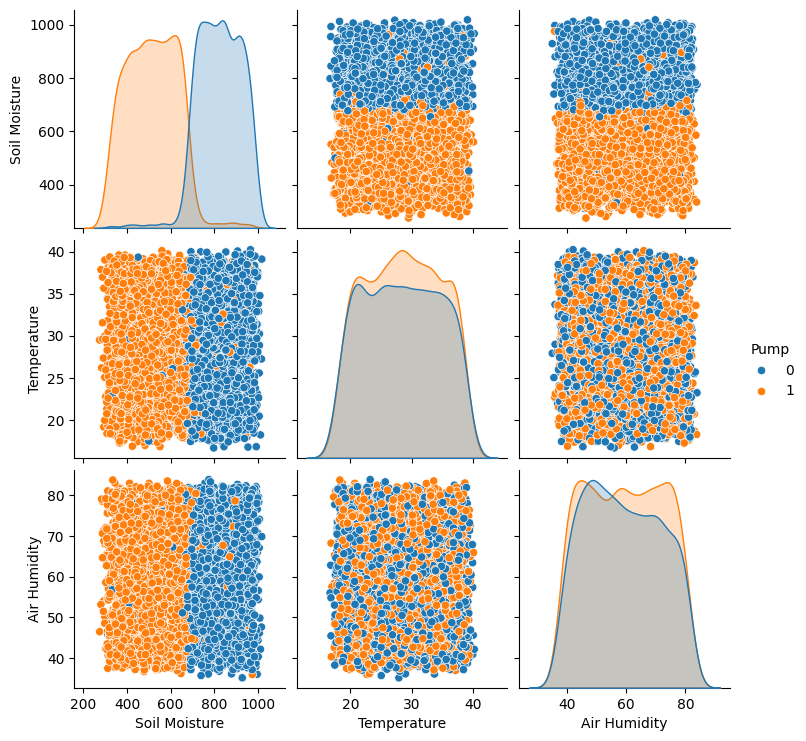

In [77]:
# Pairplot (sample visualization for small datasets)
sns.pairplot(df, hue='Pump', diag_kind='kde')
plt.show()


In [78]:
# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col != 'Pump':  # Exclude the target variable
        df[col] = LabelEncoder().fit_transform(df[col])

# Encode the target column (Pump)
label_encoder = LabelEncoder()
df['Pump'] = label_encoder.fit_transform(df['Pump'])  # Converts target into numerical values


In [79]:
# Separate features (X) and target (y)
X = df.drop(columns=['Pump'])
y = df['Pump']


In [80]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [81]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [82]:
# Create and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # Use RBF kernel (default)
svm_model.fit(X_train, y_train)


SVC(random_state=42)

In [83]:
# Predict on the test set
y_pred = svm_model.predict(X_test)


In [84]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 96.50%


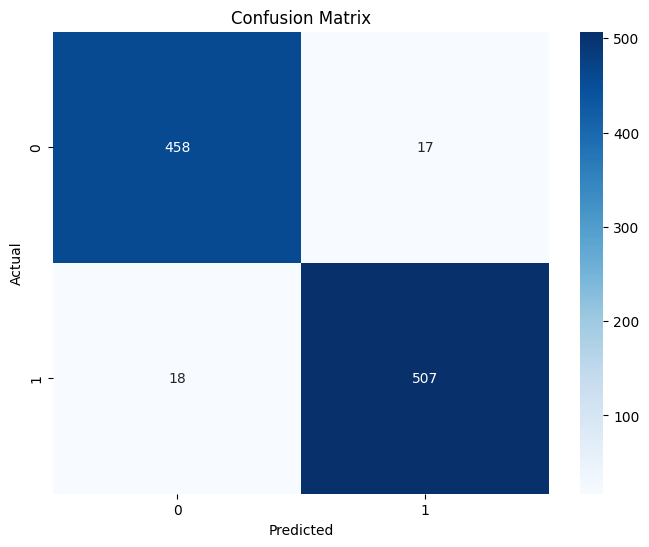

In [85]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [86]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:


TypeError: object of type 'numpy.int64' has no len()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Perform Grid Search
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Train the SVM with best parameters
best_svm_model = grid_search.best_estimator_


Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9574999999999999
